### Task 1: Data Profiling to Understand Data Quality
**Description**: Use basic statistical methods to profile a dataset and identify potential quality issues.

**Steps**:
1. Load the dataset using pandas in Python.
2. Understand the data by checking its basic statistics.
3. Identify null values.
4. Check unique values for categorical columns.
5. Review outliers using box plots.

### Basic Statistics ###
               age gender  purchase_amount
count     6.000000      6         7.000000
unique         NaN      2              NaN
top            NaN      M              NaN
freq           NaN      3              NaN
mean     44.500000    NaN       524.285714
std      37.489999    NaN      1092.807655
min      22.000000    NaN        50.000000
25%      26.250000    NaN        85.000000
50%      30.000000    NaN       100.000000
75%      37.500000    NaN       175.000000
max     120.000000    NaN      3000.000000

### Missing Values ###
age                1
gender             1
purchase_amount    0
dtype: int64

### Unique Values (Categoricals) ###
gender: ['M' 'F' None]

### Visualizing Outliers with Box Plots ###


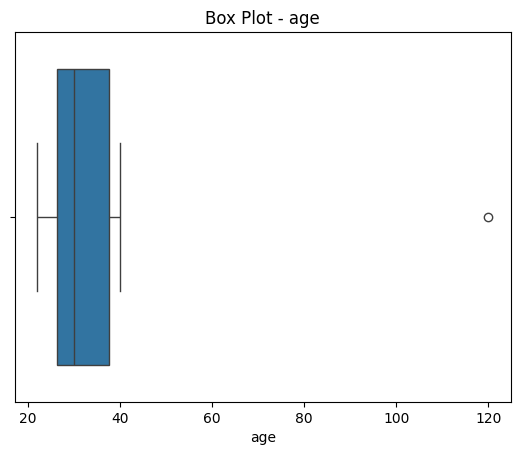

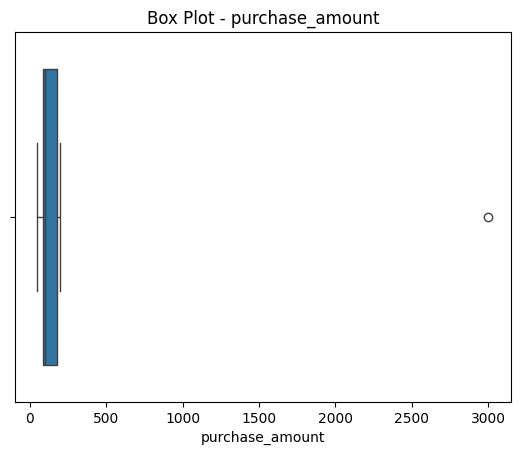

In [1]:
# write your code from here
# Required installations (run in terminal):
# pip install pandas seaborn matplotlib

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
# Replace with your file path or URL
# Example: df = pd.read_csv("ecommerce_data.csv")
data = {
    "age": [25, 30, 22, None, 40, 30, 120],
    "gender": ["M", "F", "F", "M", "F", None, "M"],
    "purchase_amount": [100, 150, 80, 200, 3000, 50, 90]
}
df = pd.DataFrame(data)

# 2. Basic statistics
print("### Basic Statistics ###")
print(df.describe(include='all'))

# 3. Identify null values
print("\n### Missing Values ###")
print(df.isnull().sum())

# 4. Unique values for categorical columns
print("\n### Unique Values (Categoricals) ###")
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}")

# 5. Outliers using box plots
print("\n### Visualizing Outliers with Box Plots ###")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot - {col}")
    plt.show()


### Task 2: Implement Simple Data Validation
**Description**: Write a Python script to validate the data types and constraints of each column in a dataset.

**Steps**:
1. Define constraints for each column.
2. Validate each column based on its constraints.

In [2]:
# write your code from here
import pandas as pd
import numpy as np

# Sample dataset
data = {
    "user_id": [1, 2, 3, 4],
    "age": [25, 30, -1, 130],  # Invalid ages
    "gender": ["M", "F", "O", "X"],  # "X" is invalid
    "purchase_amount": [100.0, 200.5, None, -50.0]  # Negative and missing value
}
df = pd.DataFrame(data)

# 1. Define constraints
constraints = {
    "user_id": {"dtype": "int64"},
    "age": {"dtype": "int64", "min": 0, "max": 120},
    "gender": {"dtype": "object", "allowed": ["M", "F", "O"]},
    "purchase_amount": {"dtype": "float64", "min": 0}
}

# 2. Validate each column
def validate_column(column, rules):
    errors = []

    # Check data type
    if column not in df.columns:
        errors.append("Missing column.")
        return errors

    if df[column].dtype != rules["dtype"]:
        errors.append(f"Expected dtype {rules['dtype']}, got {df[column].dtype}")

    # Check min value
    if "min" in rules:
        invalid_min = df[column] < rules["min"]
        if invalid_min.any():
            errors.append(f"Values below minimum ({rules['min']}) in rows: {df[invalid_min].index.tolist()}")

    # Check max value
    if "max" in rules:
        invalid_max = df[column] > rules["max"]
        if invalid_max.any():
            errors.append(f"Values above maximum ({rules['max']}) in rows: {df[invalid_max].index.tolist()}")

    # Check allowed values
    if "allowed" in rules:
        invalid = ~df[column].isin(rules["allowed"])
        if invalid.any():
            errors.append(f"Invalid values in rows: {df[invalid].index.tolist()}")

    # Check for nulls
    if df[column].isnull().any():
        errors.append(f"Missing values in rows: {df[df[column].isnull()].index.tolist()}")

    return errors

# Run validations
print("### Validation Results ###")
for col, rule in constraints.items():
    issues = validate_column(col, rule)
    if issues:
        print(f"\nColumn: {col}")
        for issue in issues:
            print(" -", issue)
    else:
        print(f"\nColumn: {col} is valid.")


### Validation Results ###

Column: user_id is valid.

Column: age
 - Values below minimum (0) in rows: [2]
 - Values above maximum (120) in rows: [3]

Column: gender
 - Invalid values in rows: [3]

Column: purchase_amount
 - Values below minimum (0) in rows: [3]
 - Missing values in rows: [2]


### Task 3: Detect Missing Data Patterns
**Description**: Analyze and visualize missing data patterns in a dataset.

**Steps**:
1. Visualize missing data using a heatmap.
2. Identify patterns in missing data.

In [3]:
# write your code from here
# Required installations (run in terminal):
# pip install pandas seaborn matplotlib missingno

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Sample dataset with missing values
data = {
    "user_id": [1, 2, 3, 4, 5],
    "age": [25, None, 30, None, 22],
    "gender": ["M", "F", None, "M", None],
    "income": [50000, None, 62000, 58000, None]
}
df = pd.DataFrame(data)

# 1. Visualize missing data using heatmap
print("### Missing Data Heatmap ###")
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

# Optional: Use missingno for advanced visualization
print("### Missingno Matrix ###")
msno.matrix(df)
plt.show()

# 2. Identify patterns in missing data
print("\n### Missing Data Count Per Column ###")
print(df.isnull().sum())

print("\n### Missing Data Pattern Correlations ###")
# Use missingno's heatmap to show nullity correlations
msno.heatmap(df)
plt.show()

# Additional: Check if missing values in 'age' relate to 'gender' or 'income'
print("\n### Pattern Check: Rows with missing 'age' ###")
print(df[df['age'].isnull()])


ModuleNotFoundError: No module named 'missingno'

### Task 4: Integrate Automated Data Quality Checks
**Description**: Integrate automated data quality checks using the Great Expectations library for a dataset.

**Steps**:
1. Install and initialize Great Expectations.
2. Set up Great Expectations.
3. Add further checks and validate.

In [4]:
# write your code from here
# Step 1: Install Great Expectations (run in terminal, not in script)
# pip install great_expectations

import pandas as pd
import great_expectations as ge

# Step 2: Sample dataset
data = {
    "user_id": [1, 2, 3, 4, 5],
    "age": [25, 30, 150, None, 22],  # 150 and None are issues
    "gender": ["M", "F", "F", "X", None],  # "X" and None are issues
    "purchase_amount": [100.0, 250.5, -50.0, 300.0, None]  # -50 and None are issues
}
df = pd.DataFrame(data)

# Step 3: Convert pandas DataFrame to GE dataset
dataset = ge.from_pandas(df)

# Step 4: Add expectations (automated data checks)
dataset.expect_column_values_to_not_be_null("user_id")
dataset.expect_column_values_to_be_between("age", min_value=0, max_value=120, mostly=1.0)
dataset.expect_column_values_to_be_in_set("gender", ["M", "F", "O"], mostly=1.0)
dataset.expect_column_values_to_be_greater_than("purchase_amount", 0, mostly=1.0)

# Step 5: Validate and print results
results = dataset.validate()

print("\n### Great Expectations Validation Results ###")
for res in results["results"]:
    print(f"{res['expectation_config']['expectation_type']}: {'✅ Passed' if res['success'] else '❌ Failed'}")

# Optional: Full output
# print(results)


AttributeError: module 'great_expectations' has no attribute 'from_pandas'